In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import requests
import json
from api_key import data_gov_key
import sys

# Study data files
presidential_votes_path = "1976-2016-president.csv"

# Read the presidential votes csv
presidential_votes_data = pd.read_csv(presidential_votes_path)

In [2]:
# Create a data frame out of the data from the csv 
presidential_votes_df = pd.DataFrame(presidential_votes_data)

In [3]:
# show new data frame
presidential_votes_df

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party,writein,candidatevotes,totalvotes,version,notes
0,1976,Alabama,AL,1,63,41,US President,"Carter, Jimmy",democrat,False,659170,1182850,20171015,NaN
1,1976,Alabama,AL,1,63,41,US President,"Ford, Gerald",republican,False,504070,1182850,20171015,NaN
2,1976,Alabama,AL,1,63,41,US President,"Maddox, Lester",american independent party,False,9198,1182850,20171015,NaN
3,1976,Alabama,AL,1,63,41,US President,"Bubar, Benjamin """"Ben""""",prohibition,False,6669,1182850,20171015,NaN
4,1976,Alabama,AL,1,63,41,US President,"Hall, Gus",communist party use,False,1954,1182850,20171015,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3735,2016,Wyoming,WY,56,83,68,US President,NaN,NaN,True,6904,258788,20171015,NaN
3736,2016,Wyoming,WY,56,83,68,US President,NaN,independent,False,3224,258788,20171015,NaN
3737,2016,Wyoming,WY,56,83,68,US President,Blank Vote,NaN,False,2661,258788,20171015,NaN
3738,2016,Wyoming,WY,56,83,68,US President,"Castle, Darrell L.",constitution party,False,2042,258788,20171015,NaN


In [4]:
presidential_votes_df= presidential_votes_df.drop(['state_fips', 'state_cen', 'state_ic',
                 'office', 'party', 'writein', 'totalvotes',
                 'version', 'notes'], axis=1)

In [5]:
presidential_votes_df.head()

,year,state,state_po,candidate,candidatevotes
0,1976,Alabama,AL,"Carter, Jimmy",659170
1,1976,Alabama,AL,"Ford, Gerald",504070
2,1976,Alabama,AL,"Maddox, Lester",9198
3,1976,Alabama,AL,"Bubar, Benjamin """"Ben""""",6669
4,1976,Alabama,AL,"Hall, Gus",1954


In [6]:
presidential_votes_df.rename(columns = {'state_po':'contributor_state'}, inplace = True)

In [7]:
presidential_votes_df

,year,state,contributor_state,candidate,candidatevotes
0,1976,Alabama,AL,"Carter, Jimmy",659170
1,1976,Alabama,AL,"Ford, Gerald",504070
2,1976,Alabama,AL,"Maddox, Lester",9198
3,1976,Alabama,AL,"Bubar, Benjamin """"Ben""""",6669
4,1976,Alabama,AL,"Hall, Gus",1954
...,...,...,...,...,...
3735,2016,Wyoming,WY,NaN,6904
3736,2016,Wyoming,WY,NaN,3224
3737,2016,Wyoming,WY,Blank Vote,2661
3738,2016,Wyoming,WY,"Castle, Darrell L.",2042


In [8]:
presidential_votes_df = presidential_votes_df.loc[presidential_votes_df['year'] == 2016]

In [9]:
presidential_votes_df.head()

,year,state,contributor_state,candidate,candidatevotes
3395,2016,Alabama,AL,"Trump, Donald J.",1318255
3396,2016,Alabama,AL,"Clinton, Hillary",729547
3397,2016,Alabama,AL,"Johnson, Gary",44467
3398,2016,Alabama,AL,NaN,21712
3399,2016,Alabama,AL,"Stein, Jill",9391


In [10]:
pres_finance = pd.DataFrame()

In [11]:
# testing getting values from the FEC api
cand_url = 'https://api.open.fec.gov/v1/presidential/contributions/by_candidate/'

# set the amount of data to be returned per page. Must be under 100
per_page = 50

params = {"api_key" : data_gov_key,
         "election_year" : "2016",
         "per_page" : per_page}

# first json request to get the number of pages to loop through
cand_search = requests.get(cand_url, params=params)

# json'ing it up
cand_search = cand_search.json()

# stores the number of pages the search returns
page_nums = cand_search['pagination']['pages']

print(json.dumps(cand_search, indent=4))


{
    "api_version": "1.0",
    "pagination": {
        "pages": 34,
        "per_page": 50,
        "count": 1669,
        "page": 1
    },
    "results": [
        {
            "candidate_last_name": "All candidates",
            "rounded_net_receipts": 1462.3,
            "contributor_state": "US",
            "election_year": 2016,
            "candidate_id": "P00000001",
            "candidate_party_affiliation": null,
            "net_receipts": 1462314770.13
        },
        {
            "candidate_last_name": "Democrats",
            "rounded_net_receipts": 799.4,
            "contributor_state": "US",
            "election_year": 2016,
            "candidate_id": "P00000002",
            "candidate_party_affiliation": "DEM",
            "net_receipts": 799419661.15
        },
        {
            "candidate_last_name": "Republicans",
            "rounded_net_receipts": 639.1,
            "contributor_state": "US",
            "election_year": 2016,
            "candidate_

In [12]:
# creating lists to store the data to pass to a dataframe
id_list = []
net_rec_list = []
contr_state_list = []
can_last_name = []
can_party = []

for page in range(1, page_nums):
    params['page'] = page
    cand_data = requests.get(cand_url, params=params)
    cand_data = cand_data.json()
    
#     print(json.dumps(cand_data, indent=4))
    for result in range(0, per_page):
        try:
            id_list.append(cand_data['results'][result]['candidate_id'])
            net_rec_list.append(cand_data['results'][result]['rounded_net_receipts'])
            contr_state_list.append(cand_data['results'][result]['contributor_state'])
            can_last_name.append(cand_data['results'][result]['candidate_last_name'])
            can_party.append(cand_data['results'][result]['candidate_party_affiliation'])
            print("Data appended")
        except:
            print("Data out of range/not found...")
   

Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data a

Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data a

Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data a

In [13]:
pres_finance = pd.DataFrame({'candidate_id' : id_list,
                             'candidate_party' : can_party,
                             'candidate_last_name' : can_last_name,
                            'rounded_net_receipts' : net_rec_list,
                           'contributor_state' : contr_state_list})
pres_finance

,candidate_id,candidate_party,candidate_last_name,rounded_net_receipts,contributor_state
0,P00000001,None,All candidates,1462.3,US
1,P00000002,DEM,Democrats,799.4,US
2,P00000003,REP,Republicans,639.1,US
3,P00003392,DEM,Clinton,563.8,US
4,P80001571,REP,Trump,333.1,US
...,...,...,...,...,...
1645,P00000002,DEM,Democrats,0.0,KE
1646,P00003392,DEM,Clinton,0.0,BE
1647,P00000001,None,All candidates,0.0,BE
1648,P00000002,DEM,Democrats,0.0,BE


In [14]:
cand_search['results'][0]['rounded_net_receipts']

1462.3

In [15]:
page_nums = 2
params['page'] = page_nums
params

{'api_key': 'y7OEg0YLriSiwo3o1L90fShNhSBEYQxkHgB1Ey3d',
 'election_year': '2016',
 'per_page': 50,
 'page': 2}

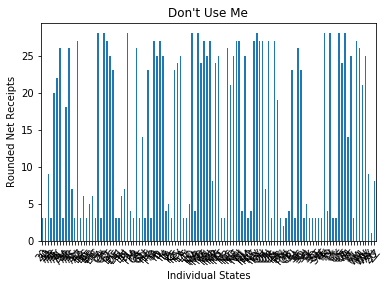

In [16]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.


contributions_candidates_by_state = pres_finance.groupby("contributor_state").count()["rounded_net_receipts"]
pyplot_bar_state = pd.DataFrame(contributions_candidates_by_state)

also = pyplot_bar_state.plot.bar(legend=False,rot=50)
also
plt.xlabel("Individual States")
plt.ylabel("Rounded Net Receipts")
plt.title("Don't Use Me")
plt.savefig("output/pyplot_bar_state")


In [17]:
state_list = ["AL", "AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","IL","IN","IA","KS","KY","LA","ME","MD","MA","MI",
              "MN","MS","MO","MT","NE","NV","NH","NJ","NM","NY","NC","ND","OH","OK","OR","PA","RI","SC","SD","TN","TX",
             "UT","VT","VA","WA","WV","WI","WY"]

In [18]:
pres_finance_states=pres_finance["contributor_state"].isin(state_list)
pres_finance[pres_finance_states]
states_df = pd.DataFrame(pres_finance[pres_finance_states])

In [19]:
states_df

,candidate_id,candidate_party,candidate_last_name,rounded_net_receipts,contributor_state
6,P00000001,None,All candidates,172.0,NY
7,P00000002,DEM,Democrats,153.9,NY
8,P00000001,None,All candidates,152.3,CA
9,P00003392,DEM,Clinton,145.2,NY
10,P00000002,DEM,Democrats,114.5,CA
...,...,...,...,...,...
1582,P60007697,REP,Graham,0.0,ME
1586,P20003281,REP,Perry,0.0,UT
1587,P20003281,REP,Perry,0.0,MD
1589,P80003478,REP,Huckabee,0.0,VT


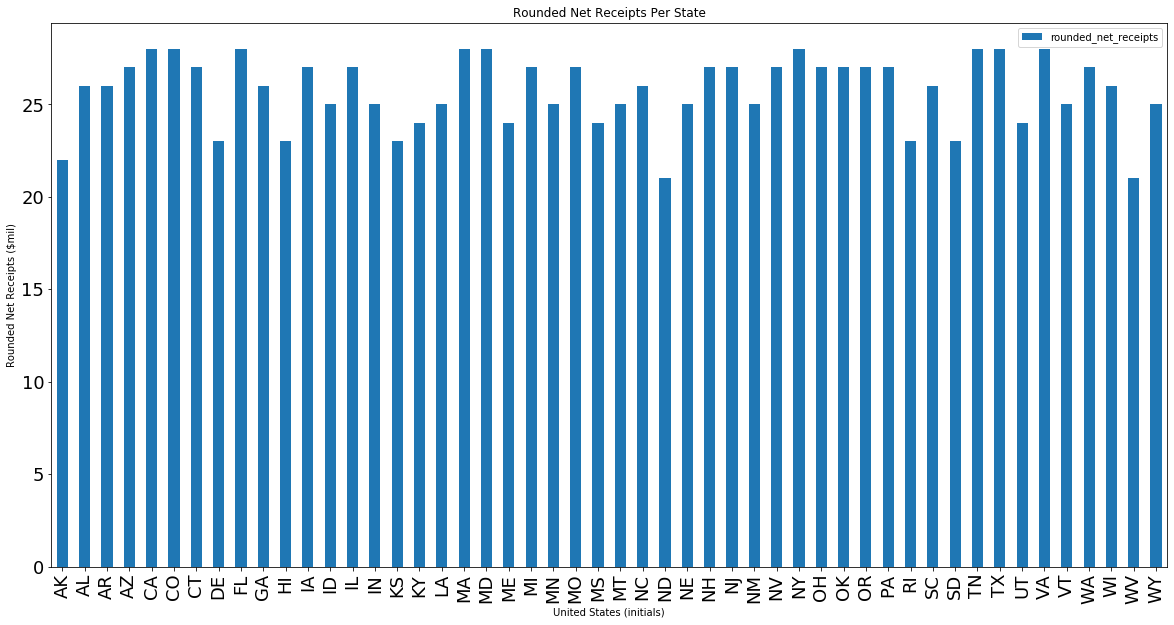

In [20]:
states_receipts = states_df.groupby("contributor_state").count()["rounded_net_receipts"]
pyplot_bar_United_States = pd.DataFrame(states_receipts)

also = pyplot_bar_United_States.plot(kind='bar', stacked=True, figsize=(20,10), fontsize=18)
also
plt.xlabel("United States (initials)")
plt.ylabel("Rounded Net Receipts ($mil)")
plt.title("Rounded Net Receipts Per State")
plt.savefig("output/pyplot_bar_United_States")


In [21]:
# 
pres_finance_countries=~pres_finance["contributor_state"].isin(state_list)
pres_finance[pres_finance_countries]
countries_df = pd.DataFrame(pres_finance[pres_finance_countries])
countries_df


,candidate_id,candidate_party,candidate_last_name,rounded_net_receipts,contributor_state
0,P00000001,None,All candidates,1462.3,US
1,P00000002,DEM,Democrats,799.4,US
2,P00000003,REP,Republicans,639.1,US
3,P00003392,DEM,Clinton,563.8,US
4,P80001571,REP,Trump,333.1,US
...,...,...,...,...,...
1645,P00000002,DEM,Democrats,0.0,KE
1646,P00003392,DEM,Clinton,0.0,BE
1647,P00000001,None,All candidates,0.0,BE
1648,P00000002,DEM,Democrats,0.0,BE


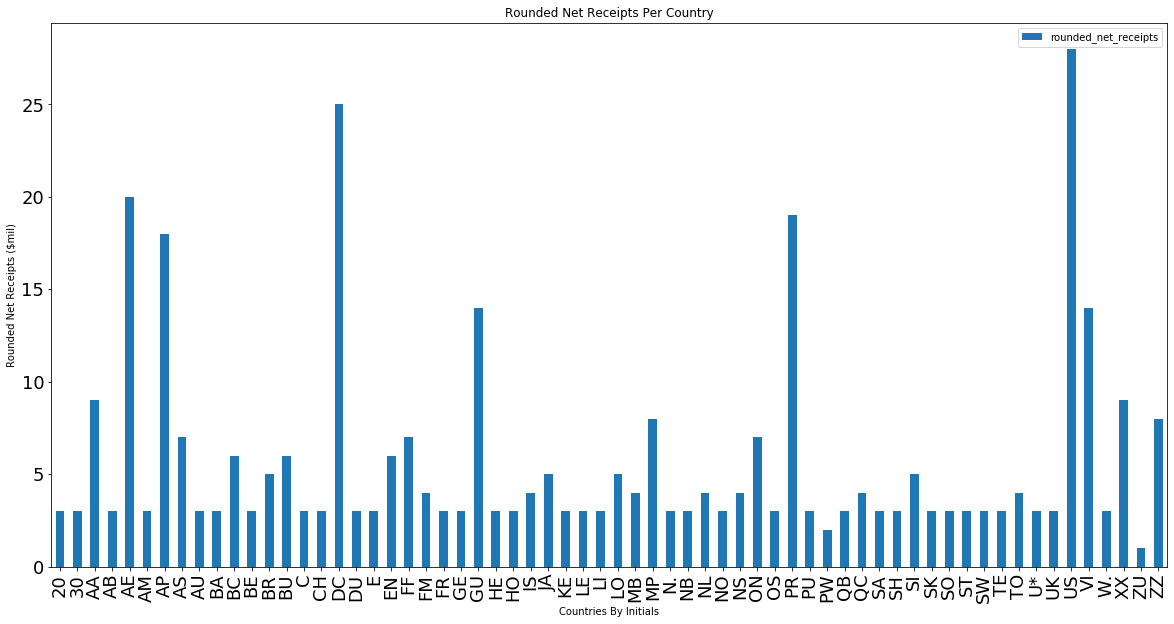

In [22]:
countries_receipts = countries_df.groupby("contributor_state").count()["rounded_net_receipts"]
pyplot_bar_countries = pd.DataFrame(countries_receipts)

also = pyplot_bar_countries.plot(kind='bar', stacked=True, figsize=(20,10), fontsize=18)
also
plt.xlabel("Countries By Initials")
plt.ylabel("Rounded Net Receipts ($mil)")
plt.title("Rounded Net Receipts Per Country")
plt.savefig("output/pyplot_bar_countries")


In [23]:
# Combine the data into a single dataset
combined_df = pd.merge(presidential_votes_df,states_df, on=("contributor_state"))
combined_df

,year,state,contributor_state,candidate,candidatevotes,candidate_id,candidate_party,candidate_last_name,rounded_net_receipts
0,2016,Alabama,AL,"Trump, Donald J.",1318255,P00000001,None,All candidates,6.4
1,2016,Alabama,AL,"Trump, Donald J.",1318255,P00000003,REP,Republicans,4.2
2,2016,Alabama,AL,"Trump, Donald J.",1318255,P00000002,DEM,Democrats,2.2
3,2016,Alabama,AL,"Trump, Donald J.",1318255,P80001571,REP,Trump,2.0
4,2016,Alabama,AL,"Trump, Donald J.",1318255,P00003392,DEM,Clinton,1.9
...,...,...,...,...,...,...,...,...,...
8746,2016,Wyoming,WY,Over Vote,278,P80003379,REP,Gilmore,0.0
8747,2016,Wyoming,WY,Over Vote,278,P20003984,GRE,Stein,0.0
8748,2016,Wyoming,WY,Over Vote,278,P60022654,IND,McMullin,0.0
8749,2016,Wyoming,WY,Over Vote,278,P60009685,DEM,Lessig,0.0


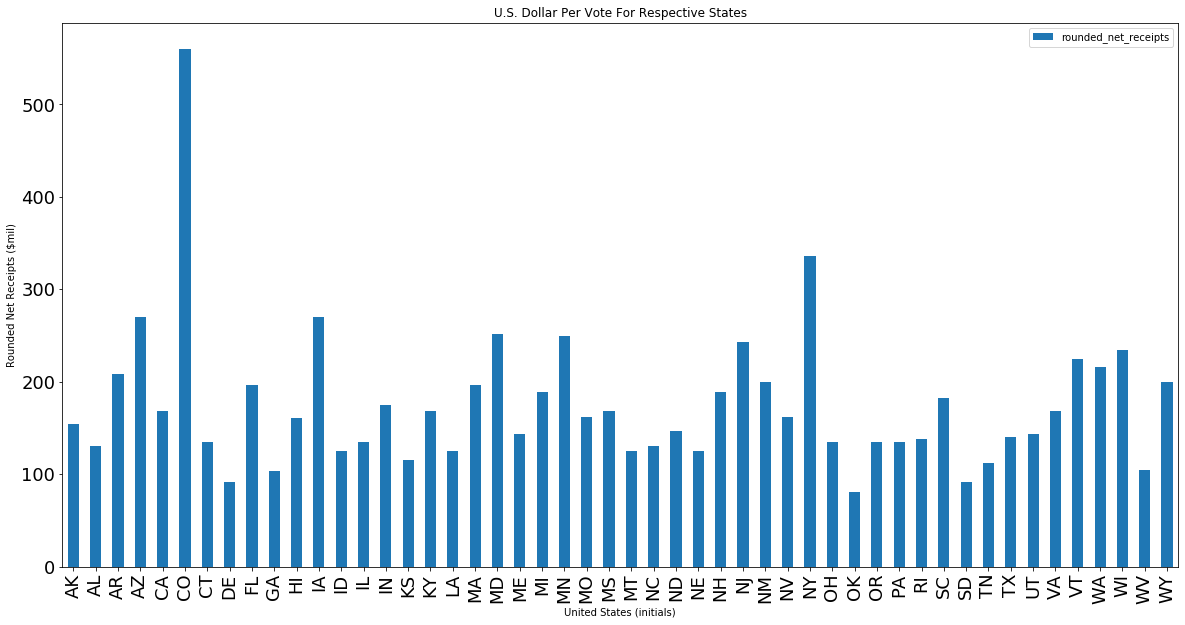

In [24]:
dollar_per_vote_state = combined_df.groupby("contributor_state").count()["rounded_net_receipts"]
pyplot_dollars_per_vote_state = pd.DataFrame(dollar_per_vote_state)

also = pyplot_dollars_per_vote_state.plot(kind='bar', stacked=True, figsize=(20,10), fontsize=18)
also
plt.xlabel("United States (initials)")
plt.ylabel("Rounded Net Receipts ($mil)")
plt.title("U.S. Dollar Per Vote For Respective States")
plt.savefig("output/pyplot_bar_countries")

In [25]:
combined_df

,year,state,contributor_state,candidate,candidatevotes,candidate_id,candidate_party,candidate_last_name,rounded_net_receipts
0,2016,Alabama,AL,"Trump, Donald J.",1318255,P00000001,None,All candidates,6.4
1,2016,Alabama,AL,"Trump, Donald J.",1318255,P00000003,REP,Republicans,4.2
2,2016,Alabama,AL,"Trump, Donald J.",1318255,P00000002,DEM,Democrats,2.2
3,2016,Alabama,AL,"Trump, Donald J.",1318255,P80001571,REP,Trump,2.0
4,2016,Alabama,AL,"Trump, Donald J.",1318255,P00003392,DEM,Clinton,1.9
...,...,...,...,...,...,...,...,...,...
8746,2016,Wyoming,WY,Over Vote,278,P80003379,REP,Gilmore,0.0
8747,2016,Wyoming,WY,Over Vote,278,P20003984,GRE,Stein,0.0
8748,2016,Wyoming,WY,Over Vote,278,P60022654,IND,McMullin,0.0
8749,2016,Wyoming,WY,Over Vote,278,P60009685,DEM,Lessig,0.0


In [26]:
total_clinton = combined_df.loc[combined_df['candidate']=="Clinton, Hillary"]
total_clinton

,year,state,contributor_state,candidate,candidatevotes,candidate_id,candidate_party,candidate_last_name,rounded_net_receipts
26,2016,Alabama,AL,"Clinton, Hillary",729547,P00000001,None,All candidates,6.4
27,2016,Alabama,AL,"Clinton, Hillary",729547,P00000003,REP,Republicans,4.2
28,2016,Alabama,AL,"Clinton, Hillary",729547,P00000002,DEM,Democrats,2.2
29,2016,Alabama,AL,"Clinton, Hillary",729547,P80001571,REP,Trump,2.0
30,2016,Alabama,AL,"Clinton, Hillary",729547,P00003392,DEM,Clinton,1.9
...,...,...,...,...,...,...,...,...,...
8596,2016,Wyoming,WY,"Clinton, Hillary",55973,P80003379,REP,Gilmore,0.0
8597,2016,Wyoming,WY,"Clinton, Hillary",55973,P20003984,GRE,Stein,0.0
8598,2016,Wyoming,WY,"Clinton, Hillary",55973,P60022654,IND,McMullin,0.0
8599,2016,Wyoming,WY,"Clinton, Hillary",55973,P60009685,DEM,Lessig,0.0


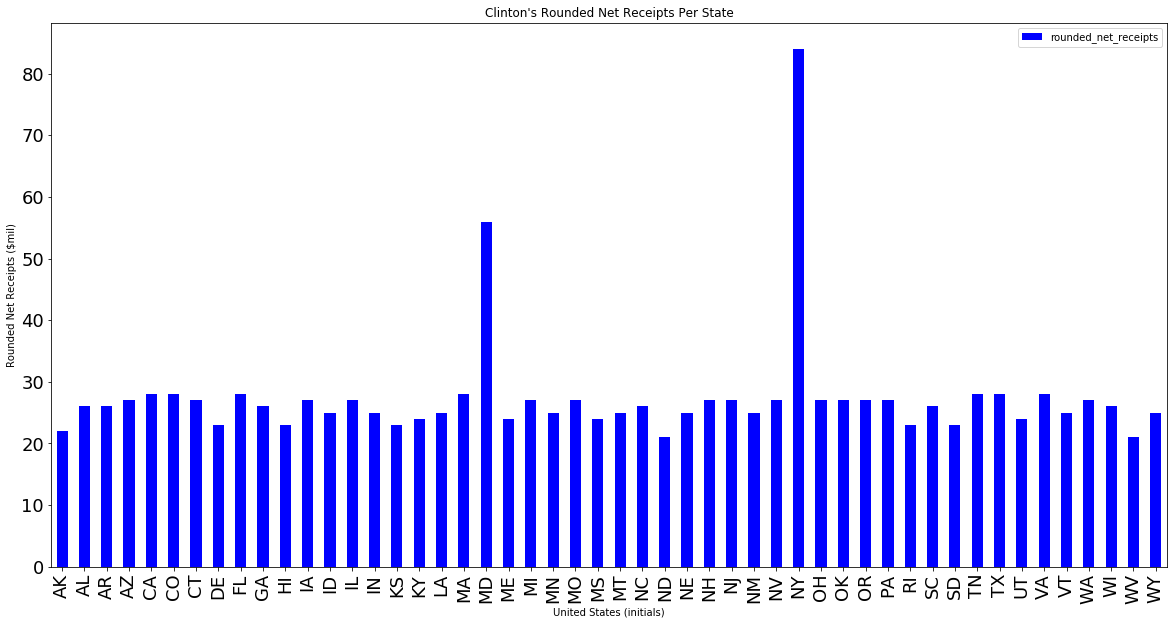

In [34]:
clinton_df = total_clinton.groupby("contributor_state").count()["rounded_net_receipts"]
pyplot_bar_clinton = pd.DataFrame(clinton_df)

also = pyplot_bar_clinton.plot(kind='bar', stacked=True, figsize=(20,10), fontsize=18, color = "b")
also
plt.xlabel("United States (initials)")
plt.ylabel("Rounded Net Receipts ($mil)")
plt.title("Clinton's Rounded Net Receipts Per State")
plt.savefig("output/pyplot_bar_clinton_net_receipts_per_state")

In [28]:
Votes_per_state_clinton =total_clinton.groupby("contributor_state").count()["rounded_net_receipts"]

In [30]:
# Using the new pandas release (0.14.0 or later) the below code will work. To create the two axis I have manually created two matplotlib axes objects (ax and ax2) which will serve for both bar plots.

# When plotting a Dataframe you can choose the axes object using ax=.... Also in order to prevent the two plots from overlapping I have modified where they align with the position keyword argument, this defaults to 0.5 but that would mean the two bar plots overlapping.

# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# from io import StringIO

# s = StringIO("""     amount     price
# A     40929   4066443
# B     93904   9611272
# C    188349  19360005
# D    248438  24335536
# E    205622  18888604
# F    140173  12580900
# G     76243   6751731
# H     36859   3418329
# I     29304   2758928
# J     39768   3201269
# K     30350   2867059""")

# df = pd.read_csv(s, index_col=0, delimiter=' ', skipinitialspace=True)

# fig = plt.figure() # Create matplotlib figure

# ax = fig.add_subplot(111) # Create matplotlib axes
# ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

# width = 0.4

# df.amount.plot(kind='bar', color='red', ax=ax, width=width, position=1)
# df.price.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

# ax.set_ylabel('Amount')
# ax2.set_ylabel('Price')

# plt.show()

In [31]:
total_trump = combined_df.loc[combined_df['candidate']=="Trump, Donald J."]
total_trump

,year,state,contributor_state,candidate,candidatevotes,candidate_id,candidate_party,candidate_last_name,rounded_net_receipts
0,2016,Alabama,AL,"Trump, Donald J.",1318255,P00000001,None,All candidates,6.4
1,2016,Alabama,AL,"Trump, Donald J.",1318255,P00000003,REP,Republicans,4.2
2,2016,Alabama,AL,"Trump, Donald J.",1318255,P00000002,DEM,Democrats,2.2
3,2016,Alabama,AL,"Trump, Donald J.",1318255,P80001571,REP,Trump,2.0
4,2016,Alabama,AL,"Trump, Donald J.",1318255,P00003392,DEM,Clinton,1.9
...,...,...,...,...,...,...,...,...,...
8571,2016,Wyoming,WY,"Trump, Donald J.",174419,P80003379,REP,Gilmore,0.0
8572,2016,Wyoming,WY,"Trump, Donald J.",174419,P20003984,GRE,Stein,0.0
8573,2016,Wyoming,WY,"Trump, Donald J.",174419,P60022654,IND,McMullin,0.0
8574,2016,Wyoming,WY,"Trump, Donald J.",174419,P60009685,DEM,Lessig,0.0


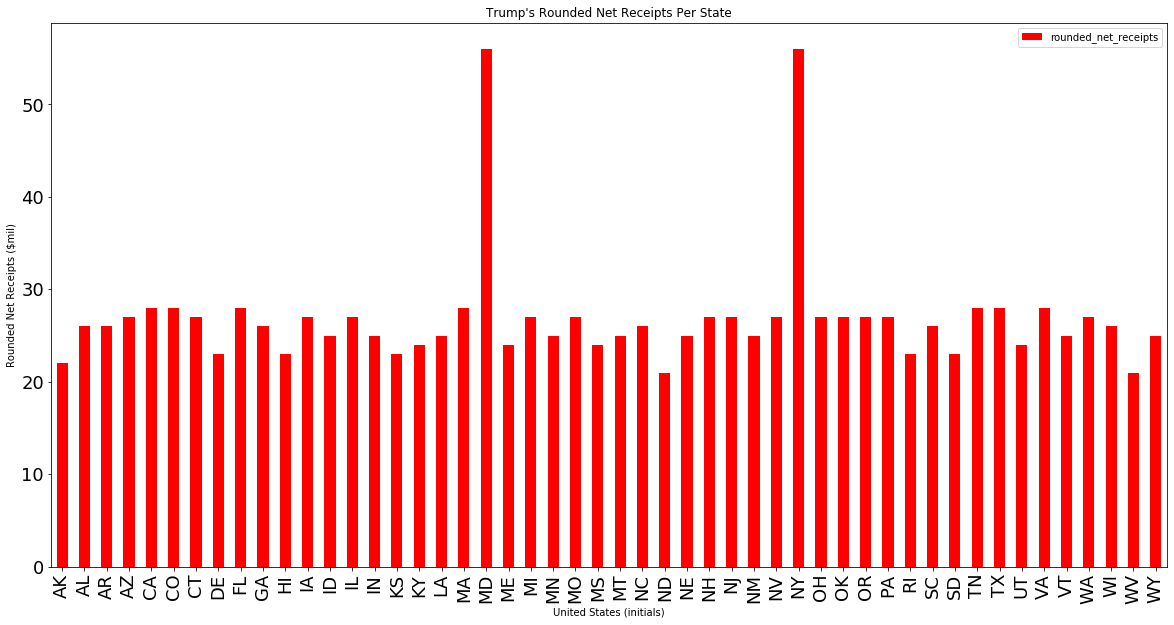

In [33]:
trump_df = total_trump.groupby("contributor_state").count()["rounded_net_receipts"]
pyplot_bar_trump = pd.DataFrame(trump_df)

also = pyplot_bar_trump.plot(kind='bar', stacked=True, figsize=(20,10), fontsize=18, color = "r")
also
plt.xlabel("United States (initials)")
plt.ylabel("Rounded Net Receipts ($mil)")
plt.title("Trump's Rounded Net Receipts Per State")
plt.savefig("output/pyplot_bar_trump_net_receipts_per_state")